In [1]:
import os
os.getcwd()

'/home/agustin/plant-traits/notebooks'

In [2]:
cd ..

/home/agustin/plant-traits


/home/agustin/.cache/pypoetry/virtualenvs/plant-traits-y5eu6WKG-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from src.preprocess_utils import drop_outliers, scale_variables
from src.constants import TARGETS, SD, ID
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, zscore, normaltest
import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
def magnitude(x):
    return np.sign(x)* 10**int(np.log10(np.abs(x)))

In [5]:
train_df = pd.read_csv('data/planttraits2024/train.csv')
test_df = pd.read_csv('data/planttraits2024/test.csv')

In [6]:
variables = train_df.columns[~train_df.columns.isin(TARGETS+SD+[ID])]

In [7]:
meta_variables = variables.str.split('_').str[:2].str.join("_").unique()

In [8]:
target_name_meta = pd.read_csv('data/planttraits2024/target_name_meta.tsv', delimiter='\t')
target_name_meta['trait_ID'] = target_name_meta['trait_ID'] + '_mean'
target_name_meta = target_name_meta.set_index('trait_ID').squeeze().to_dict()

In [9]:
train_df[TARGETS].apply(np.log)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,-0.912,2.465,-2.141,0.218,0.615,3.916
1,-0.733,2.757,-0.943,-0.442,0.303,6.353
2,-0.227,1.666,2.146,-0.928,0.851,7.030
3,-0.644,2.258,0.080,-1.870,0.144,6.950
4,-0.887,2.676,-0.419,2.391,0.809,7.778
...,...,...,...,...,...,...
55484,-1.087,2.449,-1.454,0.578,0.475,6.877
55485,-0.857,1.811,0.017,2.543,0.883,7.396
55486,-0.447,1.714,1.000,2.323,1.002,6.401
55487,-0.255,1.949,1.488,2.238,1.179,5.499


In [10]:
train_df[TARGETS].apply(normaltest, axis=0)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,23550.359,231502.807,231683.244,214883.412,231666.265,284304.521
1,0.000,0.000,0.000,0.000,0.000,0.000


In [11]:
train_df[TARGETS].apply(np.log).apply(normaltest, axis=0)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,NaN,24098.824,5373.780,635.897,22102.795,7967.699
1,NaN,0.000,0.000,0.000,0.000,0.000


In [12]:
train_zscore = train_df.apply(zscore, axis=0)
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.236,374.467,62.524,72.257,773.592,33.278,125,149,136,...,0.117,1.244,1.849,50.216,0.009,1.601,0.025,0.154,0.280,15.045
1,195542235,17.271,90.240,10.351,38.221,859.193,40.010,124,144,138,...,0.389,0.643,1.353,574.098,0.003,0.258,0.001,0.035,0.010,11.004
2,196639184,14.255,902.071,49.643,17.874,387.978,22.807,107,133,119,...,8.553,0.395,2.343,1130.097,NaN,NaN,NaN,NaN,NaN,NaN
3,195728812,18.681,1473.933,163.100,45.010,381.054,20.437,120,131,125,...,1.084,0.154,1.155,1042.687,0.012,2.818,0.111,0.011,0.229,141.857
4,195251545,0.673,530.089,50.858,38.231,1323.527,45.892,91,146,120,...,0.658,10.920,2.246,2386.467,0.006,1.128,0.027,0.554,0.107,87.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472,244.796,39.128,67.074,472.710,27.759,118,140,131,...,0.234,1.783,1.608,969.548,NaN,NaN,NaN,NaN,NaN,NaN
55485,194523231,13.724,1450.000,162.260,43.139,652.717,26.694,125,144,135,...,1.017,12.713,2.418,1630.015,0.005,0.128,0.117,3.165,0.082,136.504
55486,195888987,14.741,581.867,109.231,89.272,507.273,26.875,118,155,136,...,2.717,10.206,2.723,602.230,0.020,0.215,0.156,0.919,0.079,26.160
55487,135487319,16.095,1180.838,80.176,22.910,342.184,17.346,109,130,117,...,4.430,9.372,3.252,244.387,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
target_name_meta

{'X4_mean': 'Stem specific density (SSD) or wood density (stem dry mass per stem fresh volume) ',
 'X11_mean': 'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA) ',
 'X18_mean': 'Plant height ',
 'X26_mean': 'Seed dry mass ',
 'X50_mean': 'Leaf nitrogen (N) content per leaf area ',
 'X3112_mean': 'Leaf area (in case of compound leaves: leaf, undefined if petiole in- or excluded) '}

In [14]:
train_df[train_df.X4_mean < 0].to_csv('csv.csv')

In [15]:
magnitude_counts = train_df[TARGETS].map(magnitude, na_action='ignore').apply(pd.value_counts)
magnitude_counts


/tmp/ipykernel_6548/3309805985.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  magnitude_counts = train_df[TARGETS].map(magnitude, na_action='ignore').apply(pd.value_counts)


,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
-1.000,98.000,NaN,NaN,NaN,NaN,NaN
-0.100,57.000,NaN,NaN,NaN,NaN,NaN
0.000,NaN,NaN,7.000,NaN,NaN,4.000
0.000,NaN,NaN,NaN,2.000,NaN,NaN
0.000,NaN,NaN,7.000,NaN,NaN,NaN
0.000,NaN,4.000,3.000,NaN,4.000,3.000
0.001,NaN,NaN,12.000,52.000,NaN,2.000
0.010,7.000,27.000,61.000,352.000,15.000,8.000
0.100,16.000,8.000,2566.000,4541.000,59.000,6.000
1.000,55311.000,12369.000,46464.000,34059.000,55299.000,441.000


In [16]:
magnitude_counts.map(np.log)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
-1.000,4.585,NaN,NaN,NaN,NaN,NaN
-0.100,4.043,NaN,NaN,NaN,NaN,NaN
0.000,NaN,NaN,1.946,NaN,NaN,1.386
0.000,NaN,NaN,NaN,0.693,NaN,NaN
0.000,NaN,NaN,1.946,NaN,NaN,NaN
0.000,NaN,1.386,1.099,NaN,1.386,1.099
0.001,NaN,NaN,2.485,3.951,NaN,0.693
0.010,1.946,3.296,4.111,5.864,2.708,2.079
0.100,2.773,2.079,7.850,8.421,4.078,1.792
1.000,10.921,9.423,10.746,10.436,10.921,6.089


In [17]:
magnitude_ranges = {"X4_mean": (1e-5, 1e1),
                    "X11_mean": (1e-1, 1e2),
                    "X18_mean": (1e-2, 1e2),
                    "X26_mean": (1e-2, 1e4),
                    "X50_mean": (1e-1, 1e2),
                    "X3112_mean": (1e0, 1e5)
                    }
magnitude_mask = train_df[TARGETS].apply(lambda x: (x > magnitude_ranges[x.name][0]) & (x < magnitude_ranges[x.name][1]), axis=0)

In [18]:
(~magnitude_mask).sum(axis=1).value_counts()
wo_magnitude_outliers = train_df[~(~magnitude_mask).any(axis=1)]

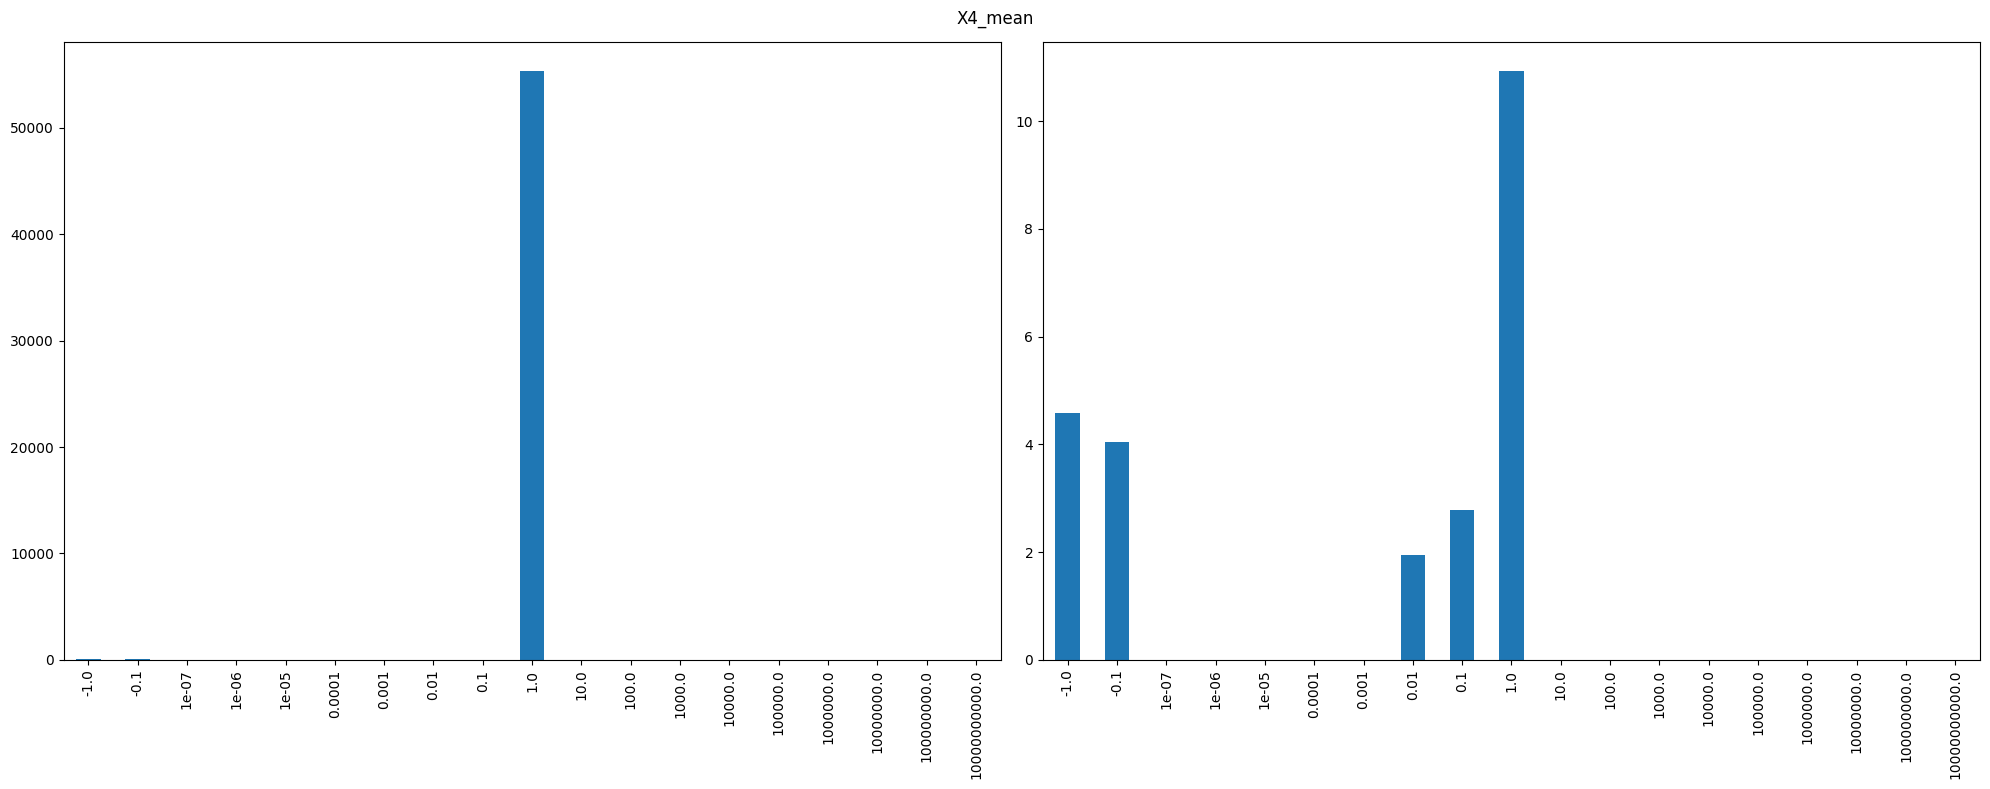

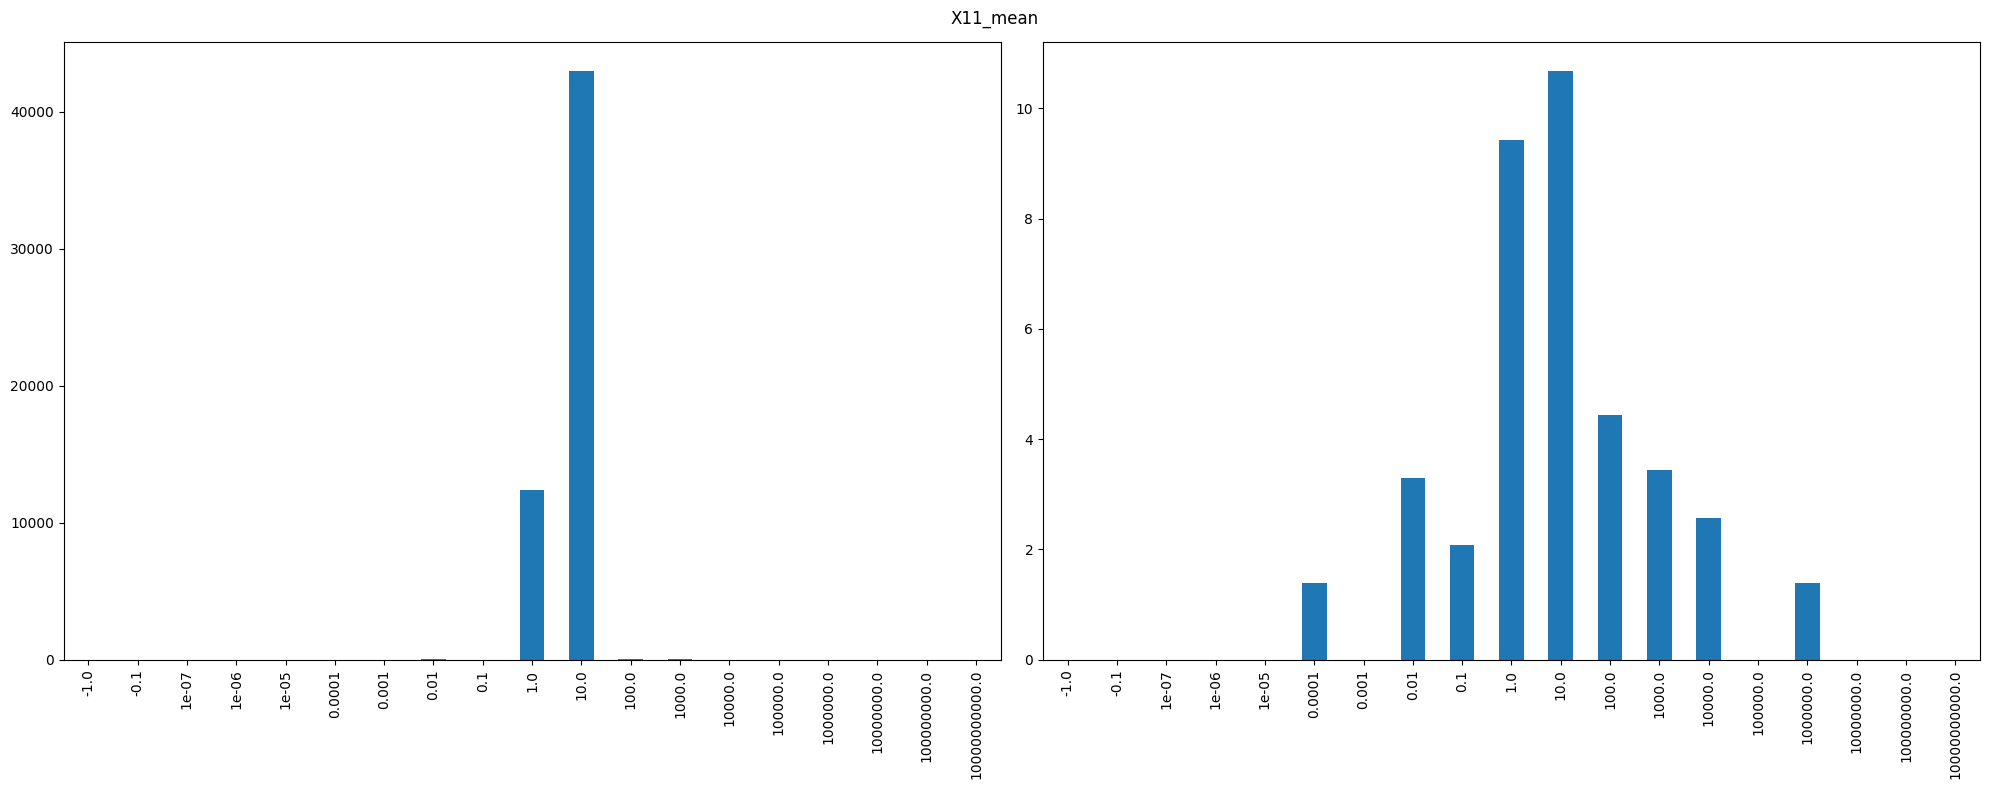

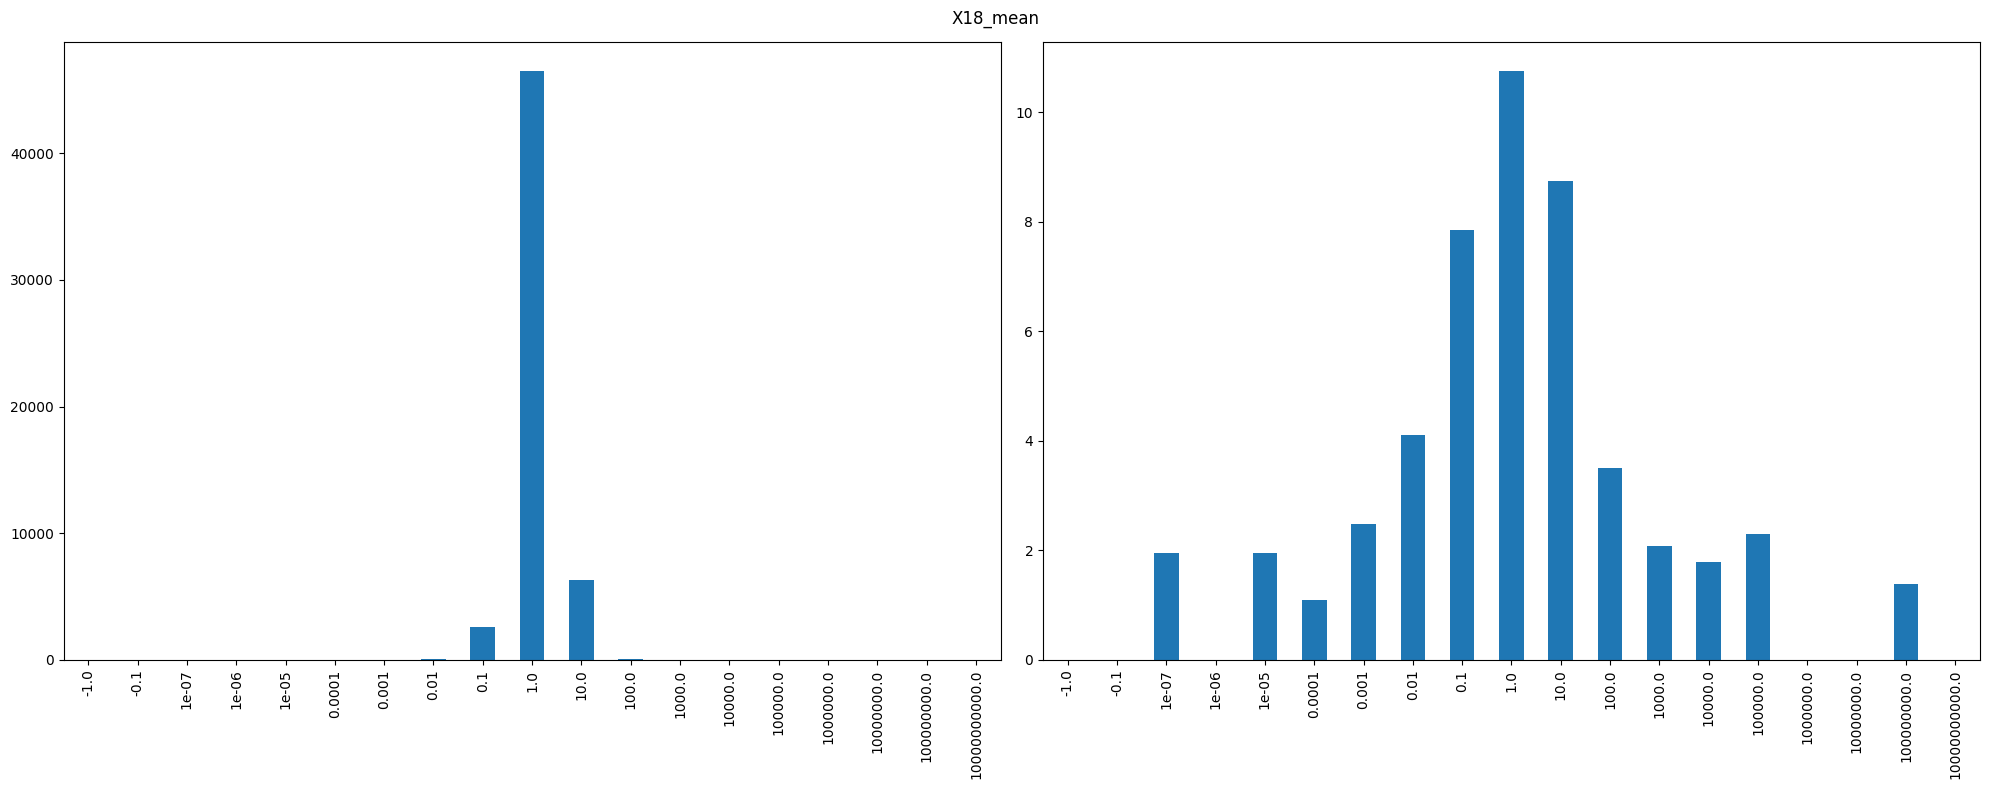

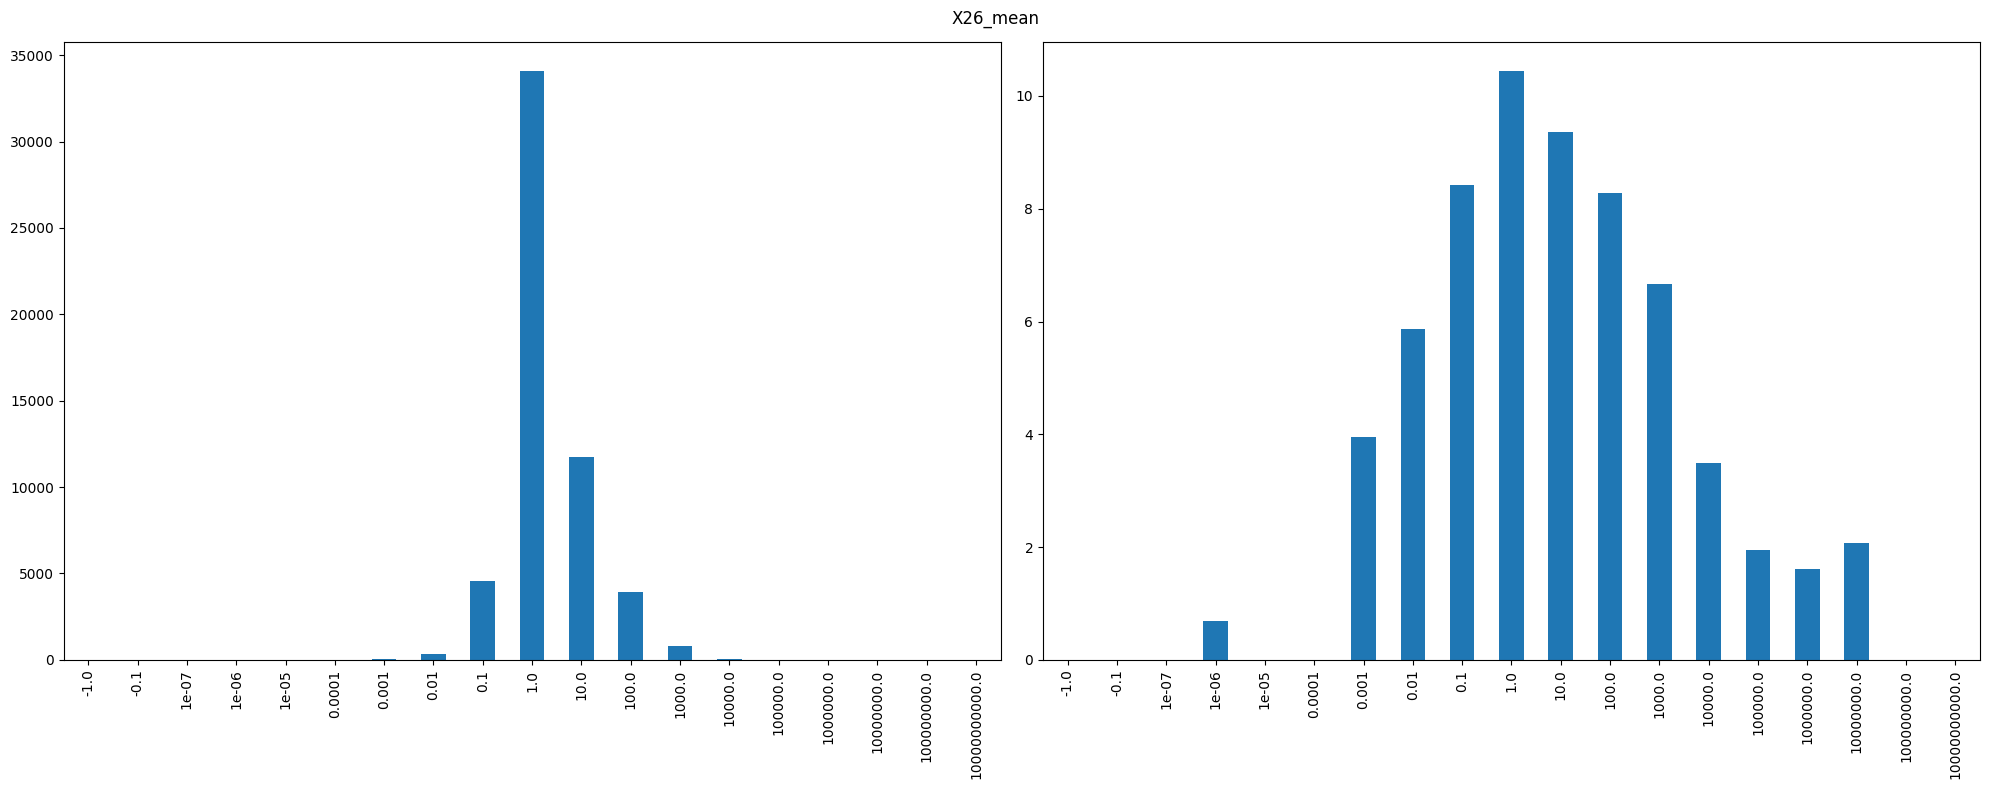

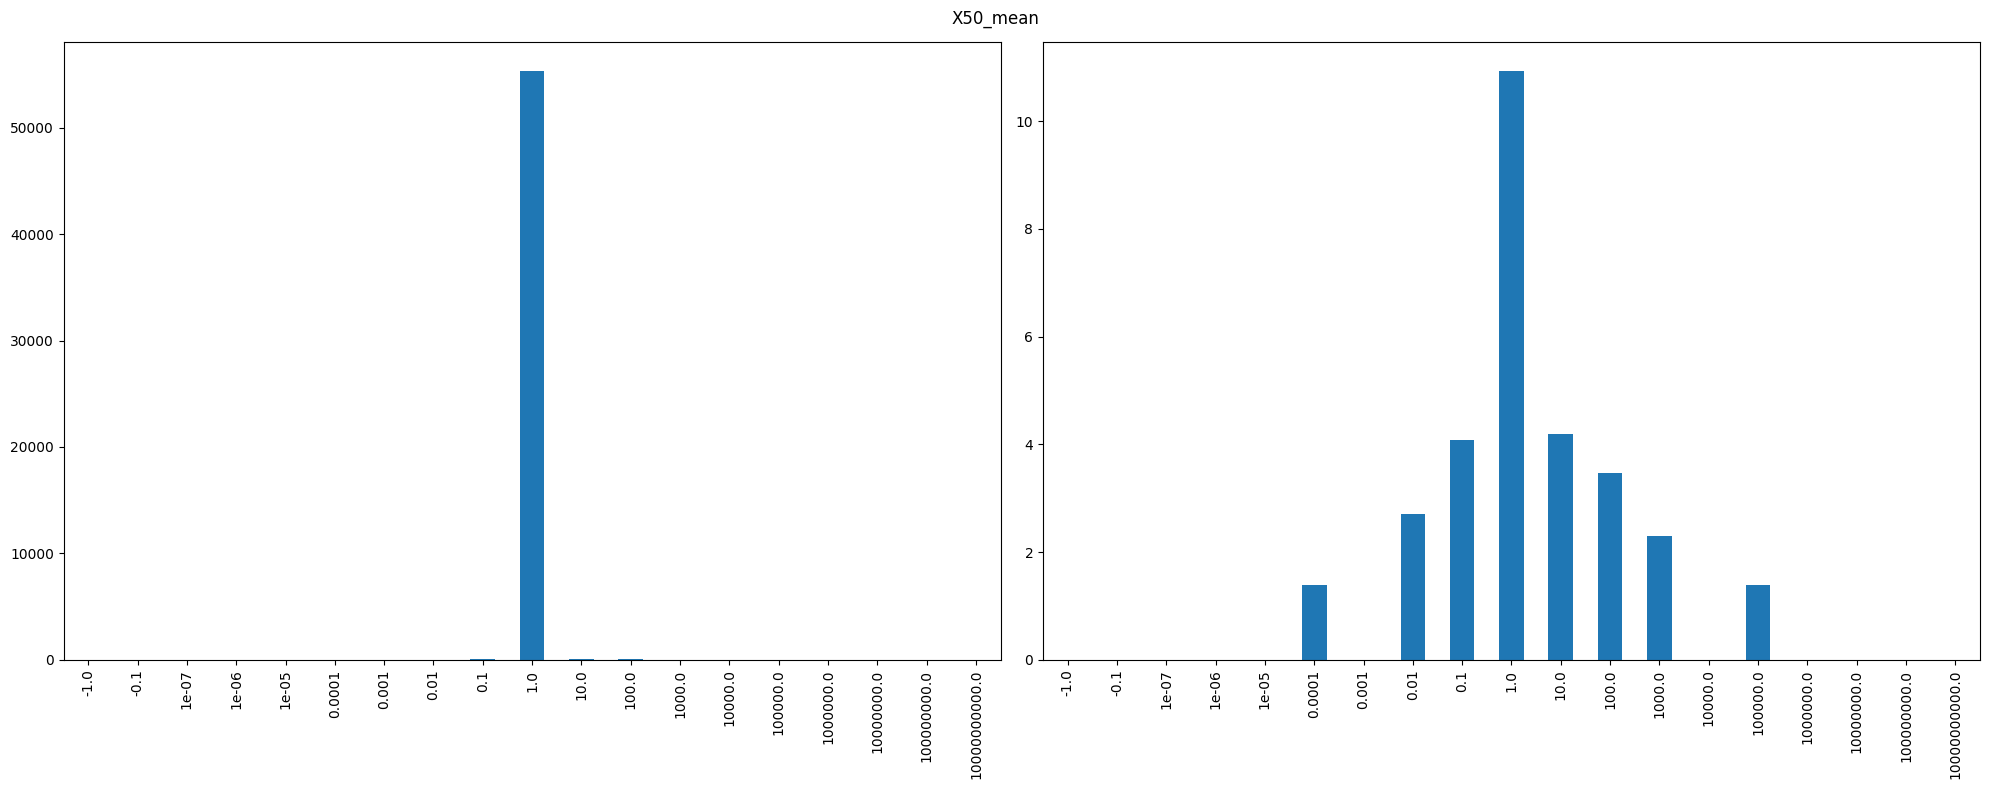

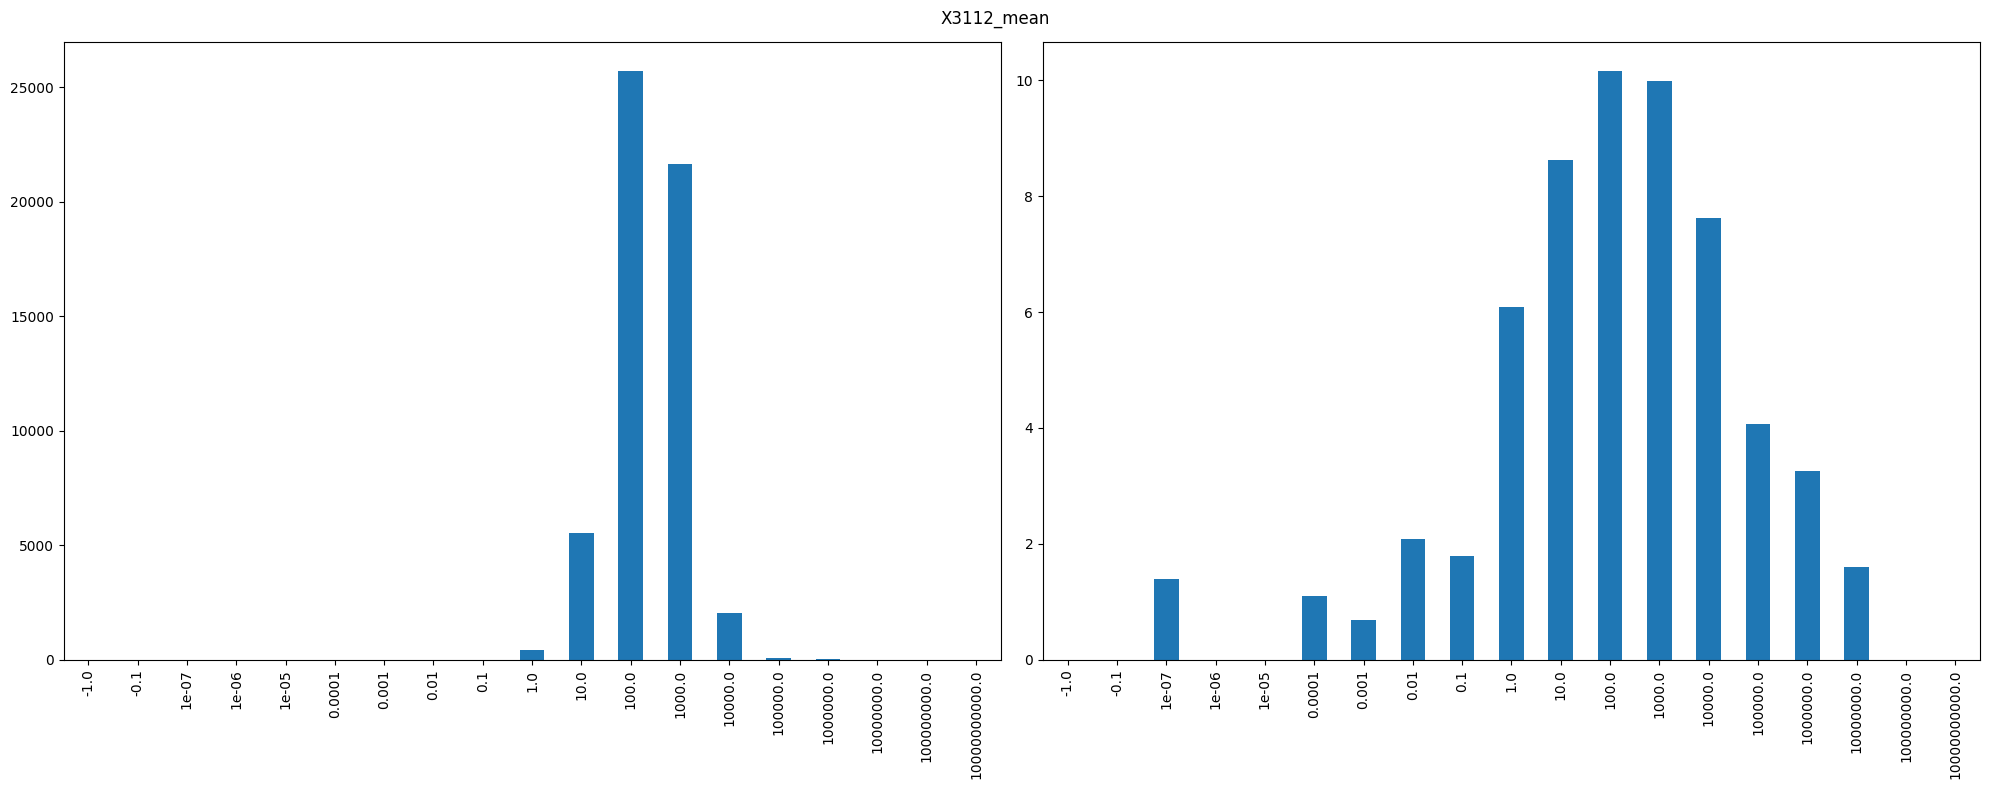

In [19]:
matplotlib.rcParams['figure.figsize'] = [20, 8]

for target in TARGETS:
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(target)
    # ax.set_yscale('log')
    magnitude_counts[target].plot(kind='bar', ax=ax[0])
    magnitude_counts[target].apply(np.log).plot(kind='bar', ax=ax[1])
    plt.tight_layout()

In [20]:
new_df = train_df[train_df.X4_mean<0]
new_df['num outliers'] = (train_zscore[train_df.X4_mean<0].abs()>2.5).sum(axis=1)
new_df.to_csv('csv.csv')

/tmp/ipykernel_6548/1629708974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['num outliers'] = (train_zscore[train_df.X4_mean<0].abs()>2.5).sum(axis=1)


In [21]:


z = 3
wo_outliers_train_df, outliers = drop_outliers(train_df, z)

Dropping 12126 rows (72 outliers per column)


In [22]:
wo_outliers_train_df[TARGETS].apply(np.log).apply(normaltest, axis=0)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,6876.802,7714.483,851.545,72.426,7955.255,1970.809
1,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
wo_magnitude_outliers[TARGETS].apply(np.log).apply(normaltest, axis=0)

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,8639.729,3835.258,4103.498,518.597,3680.314,630.113
1,0.000,0.000,0.000,0.000,0.000,0.000


In [24]:
bins = 250

Text(0.5, 1.0, 'log(wo magnistud outliers) plotted log')

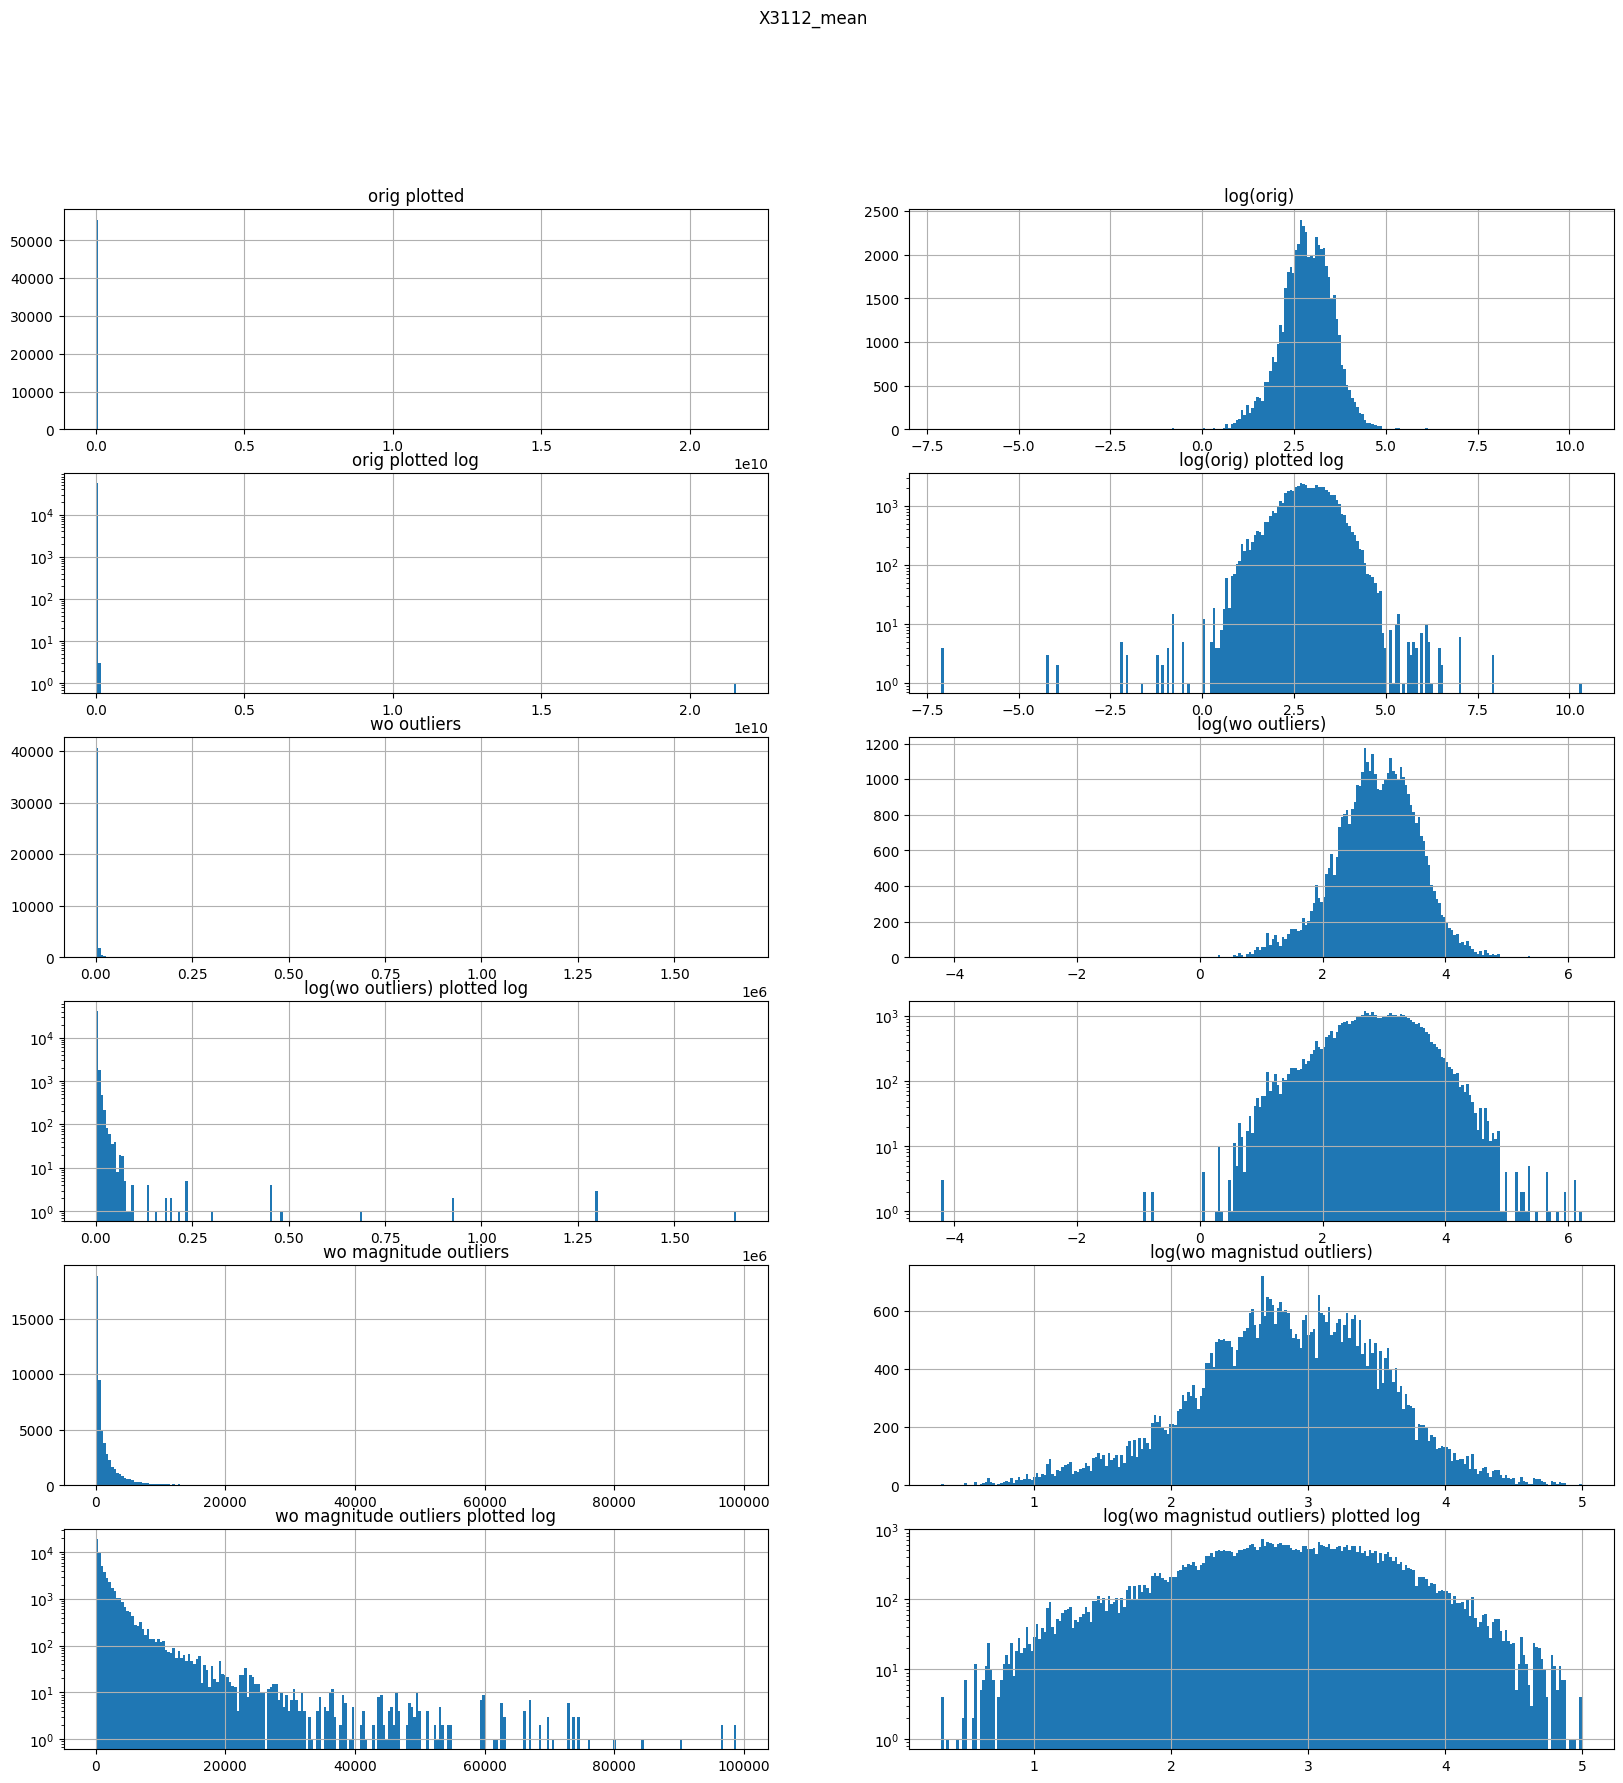

In [25]:
f = np.log10

matplotlib.rcParams['figure.figsize'] = [20, 20]

target = TARGETS[5]

fig, ax = plt.subplots(6, 2)
fig.suptitle(target)
# ax.set_yscale('log')
train_df[target].hist(ax=ax[0,0], bins=bins)
ax[0, 0].set_title('orig plotted')
train_df[target].apply(f).hist(ax=ax[0, 1], bins=bins)
ax[0, 1].set_title('log(orig) ')

# ax.set_yscale('log')
train_df[target].hist(ax=ax[1, 0], bins=bins, log=True)
ax[1, 0].set_title('orig plotted log')
train_df[target].apply(f).hist(ax=ax[1, 1], bins=bins, log=True)
ax[1, 1].set_title('log(orig) plotted log')

# ax.set_yscale('log')
wo_outliers_train_df[target].hist(ax=ax[2, 0], bins=bins)
ax[2, 0].set_title('wo outliers')
wo_outliers_train_df[target].apply(f).hist(ax=ax[2, 1],bins=bins)
ax[2, 1].set_title('log(wo outliers)')

# ax.set_yscale('log')
wo_outliers_train_df[target].hist(ax=ax[3, 0], bins=bins, log=True)
ax[3, 0].set_title('wo outliers plotted log')
wo_outliers_train_df[target].apply(f).hist(ax=ax[3, 1],bins=bins, log=True)
ax[3, 0].set_title('log(wo outliers) plotted log')

wo_magnitude_outliers[target].hist(ax=ax[4, 0], bins=bins)
ax[4, 0].set_title('wo magnitude outliers')
wo_magnitude_outliers[target].apply(f).hist(ax=ax[4, 1],bins=bins)
ax[4, 1].set_title('log(wo magnistud outliers)')

wo_magnitude_outliers[target].hist(ax=ax[5, 0], bins=bins, log=True)
ax[5, 0].set_title('wo magnitude outliers plotted log')
wo_magnitude_outliers[target].apply(f).hist(ax=ax[5, 1],bins=bins, log=True)
ax[5, 1].set_title('log(wo magnistud outliers) plotted log')

In [26]:
train_df[target].describe()

count         55489.000
mean         397555.215
std        91524633.451
min               0.000
25%             255.281
50%             724.432
75%            2148.630
max     21559109122.000
Name: X3112_mean, dtype: float64